
# Author: Husam Abdelrahim

## Assignment : Week 8 Assignment

# Auto MPG Dataset Analysis

## Introduction

In this analysis that we are going to be working with we are basically going to explore and the data that we are working with is going to be from the Auto MPG and this was loaded from the assignment repository that was gathered from the UC Irvine. So what this data set tend to contain is the there is a fuel consumpution for the automobies that is present going from the year of the 1970s to teh 1980s that does manaage to come with other arrtibutes that is presetend such as the horse power, the weight, and the country from where the automobile has managed to orignate from, this basically displays a pattern that we see with the variable and we get to see the efficiency of the fuel and what it does to relate with other automobile and as progression goes how does it really change from over time.

The analysis that I will following and the approach that I will be displayed:

    1. First we will be loading the data and looking at the inspection that is provided
    2. We are going to be cleaning the data first and then transfrom the data
    3. we are going to basically view the data more but this time will implement enhance visualizations
    4. The analysis of the relationship that we are seeing between the variables
    5. and then I will be providing a summary and conclusion in my work 

## 1. Loading the data and the inspection

For the first section that we will be working with we have to import the libaries for this assignment of course we will use the matplotlib for our graph but according to the lecture that was provided seaborn will help us enhance those visuals so now we are going to loading the data set which is the MPG that was acquired and then we will be taking a much closer look with what we are acrtually working with 

In [1]:
# what I will be presenting here is that I will be importning the essential tools that I will need for this assignment in regarding to data nalysis and the visualization that I will be presenting
import pandas as pd # we are going ot be using pandas to try and manipulate the data
import numpy as np # for numeric operations will be using numpy
import matplotlib.pyplot as plt # matplotlib is what is going to help uch make the the graph
import seaborn as sns # according the the lecture the seaborn is going to make or visualization to standout more and look even better 

In [2]:
# For the first time what we are going to do is that we are going to be defining the column names and basically what that is based on the data set that is provided in the documentation

# with the names that is being provided what is basically being done here is that the variables is what corresponding with the dataset that is being provided 

column_names = [
    "mpg", "cylinders", "displacement", "horsepower", "weight", 
    "acceleration", "model_year", "origin", "car_name" 
]

# This is what we are going to  be reviewing basically

# mpg = is going to be miles per gallon which is bascially hte fuel of the fficient
# cyclinders = which is basically the number of the engine cylinders
# displacement = this is basically a displacement in cubic inches
# horsepower = pretty self explanatory it's going to have horse power
# weight = which is basically the vechile weight in pounds
# accelaration = basically having an understanding and the time that the car would accelarte and we would be using in (seconds)
# model year = basically that the year of the model so for example 70 would represetn the 1970 and 71 would 1971 etc
# origin = which is basically the origin of the car and we are going to have 1 = USA 2 = Europe, 3 = Asia
# car name = # of the car name that is being presented in the work

# Loading the dataset

# So for the next step what I am going to be doing herei s that I am going to be using the sep and basically a quick run down on what sep does is that is that is specificies the seprator between the two strings that is presented in our work

print("Intiating the Auto MPG datset please wait...")
df = pd.read_csv('auto-mpg.data', sep='\\s+', names=column_names)
print(f"Datatset has been loaded with {df.shape[0]} rows and {df.shape[1]} columns")

# Now what we are going to be doing is that we are going to be displaying the reows and the reason for commiting to this purpose is that we just want tto make sure that the data is working properly

print("\nPresenting the first 5 rows of dataset acquired:")
print(df.head())

Intiating the Auto MPG datset please wait...
Datatset has been loaded with 398 rows and 9 columns

Presenting the first 5 rows of dataset acquired:
    mpg  cylinders  displacement horsepower  weight  acceleration  model_year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.0      150.0  3433.0          12.0          70   
4  17.0          8         302.0      140.0  3449.0          10.5          70   

   origin                   car_name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


## 2. The Data Cleaning Process and the transformation that is being provided 

Now before the analysis, what I will be doing is that we are going to address the problem that the data quality tend to have and how it's getting to transform with the certain variables and ability to make the usuable so what this section will continue to focus on is that: 

- What we are going to be doing is that we are going to handling with the missiing values that is being presenting in the work so in the horsepower column which is marked as = ?

- We will be converting the origin code s that is being provide which displays = 1,2,3 and give it a more of a region name

- Then we are going to be ensuring the data types for the columns is all presenteing 

In [3]:
# This over here is basicaly just going to present the DATA CLEANING make the code look a little cleaner 

print("\n" + "="*40)
print("DATA CLEANING")
print("="*40)

# Over here with what is being done is that we are going to be looking for the missing values that is presented in our work whic his the missing vlaues
# So in this data set that we are going to be owrking with we are going to looking at hte vissing values which is coming with the '?' which is originally coming with a NaN values

print(f"\nNumber of missing horsepower values: {(df['horsepower'] == '?').sum()}")

# Over here with what is being occured is that we are going to converty the horsepower column so instead of having  ? we are going ot turn this into a NaN

df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

# In this section what I will be doing is calcualting the median horsepower that is being presnted and basically start filling in those missing values

# we are going to be using the median and reduce the impact of the outliers

median_hp = df['horsepower'].median()
print(f"Calculated median horsepower: {median_hp:.1f}")

# now with what we are going to do here is basically be repalcing the missing values that is rpesenting in our work.
 
df['horsepower'] = df['horsepower'].fillna(median_hp)

print(f"Replaced missing values that was presented in the work with the use of median horsepower: {median_hp:.1f}")


DATA CLEANING

Number of missing horsepower values: 6
Calculated median horsepower: 93.5
Replaced missing values that was presented in the work with the use of median horsepower: 93.5


In [4]:
# now what we are going to do is that we are going to ry to convert t the original codes presented to labels that we can work with better
# so with the data set that is provided in our work we see that 1=USA 2= EURPOSE= 3= ASIA

df['origin'] = df['origin'].replace({1: 'USA', 2: 'Europe', 3: 'Asia'})
print("Converted origin codes to region names (USA, Europe, Asia)")

Converted origin codes to region names (USA, Europe, Asia)


In [5]:
# # so what is being done here is that we are going to be checking for the columns and ensure they are appropaite types after cleaning the data that is being provided. 
print("\nData types after cleaning:")
print(df.dtypes)


Data types after cleaning:
mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model_year        int64
origin           object
car_name         object
dtype: object


In [6]:
# What we are going to do here is basically create a statistics that we are gable to understand and the distribtuion that is related to the key variables.

print("\nSummary statistics for key variables:")
print(df[['mpg', 'horsepower', 'weight', 'acceleration']].describe().round(2))


Summary statistics for key variables:
          mpg  horsepower   weight  acceleration
count  398.00      398.00   398.00        398.00
mean    23.51      104.30  2970.42         15.57
std      7.82       38.22   846.84          2.76
min      9.00       46.00  1613.00          8.00
25%     17.50       76.00  2223.75         13.82
50%     23.00       93.50  2803.50         15.50
75%     29.00      125.00  3608.00         17.18
max     46.60      230.00  5140.00         24.80


## 3. Exploring the data analysis presentation

So now that we have managed to clean our data we can start to uncover the patterns that is being presented with our work, in this section we will be using various of visualization that is being presented in our work

1. We will be understanding the distribution and the engine of the cylinders
2. we will be focusing on the horse power and the weight that does come with it
3. Reviewing with how the MPG trends tend to grow by the region with time
4. the distribution of the mpg that is going by the origin
5. Reviewing the correlation that is being between the numeric variables

So these analyses will basically give us a better idea on how the patterns will be formed and understanding with what the regional differences are and basically how the auto technology really got to evolve over the time of this period  

In [7]:
print("\n" + "="*40)
print("EXPLORATORY DATA ANALYSIS")
print("="*40)


EXPLORATORY DATA ANALYSIS


## 3.1 - The distribution of the cylinder that is being presented

So at first what we will be doing is that we are going to be analyzing the distribution of the engine of the cylinder by doing this it's going to help us with understand what engines we are work with and which was were common during that time which is from the 1970-1980


1. Creating bar chart of cylinder distribution...


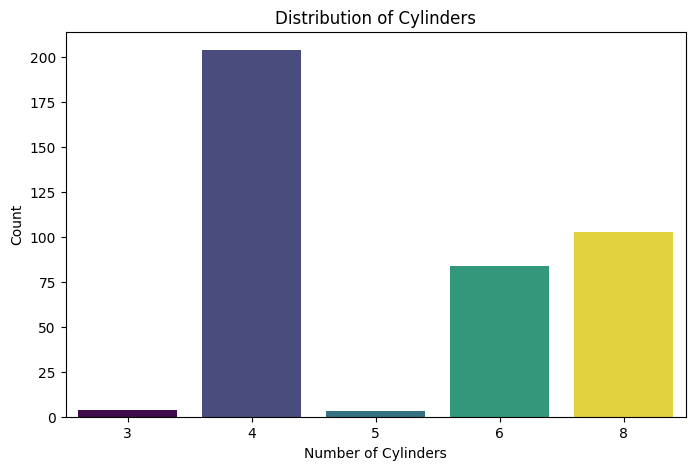

Cylinder counts:
  3 cylinders: 4 vehicles (1.0%)
  4 cylinders: 204 vehicles (51.3%)
  5 cylinders: 3 vehicles (0.8%)
  6 cylinders: 84 vehicles (21.1%)
  8 cylinders: 103 vehicles (25.9%)
Bar chart saved as 'cylinder_distribution.png'


In [8]:
# First we are going to be creating a bar shart 

print("\n1. Creating bar chart of cylinder distribution...")
plt.figure(figsize=(8, 5))
sns.countplot(x='cylinders', data=df, hue='cylinders', palette='viridis', legend=False)
plt.title("Distribution of Cylinders")
plt.xlabel("Number of Cylinders")
plt.ylabel("Count")
plt.savefig('cylinder_distribution.png')
plt.show()
plt.close()


# We ar egoing ot be analyzing the cylinder distribution provided 
cylinder_counts = df['cylinders'].value_counts().sort_index()
print("Cylinder counts:")
for cyl, count in cylinder_counts.items():
    percent = (count / len(df)) * 100
    print(f"  {cyl} cylinders: {count} vehicles ({percent:.1f}%)")
print("Bar chart saved as 'cylinder_distribution.png'")

## 3.2 - We will be exploring the relationship with the horsepower and the weight of the car

So for this analysis what I will be doing is that I will be taking a look at the relationship of the weight of the car this is being provided but also look at the horsepower as well and these really play a crucial role in the characteristics that is being provided and the performance, when we start coloring the point with the region of the orin, we are starting to see how a different region has been approached


2. Creating scatter plot of horsepower vs. weight...


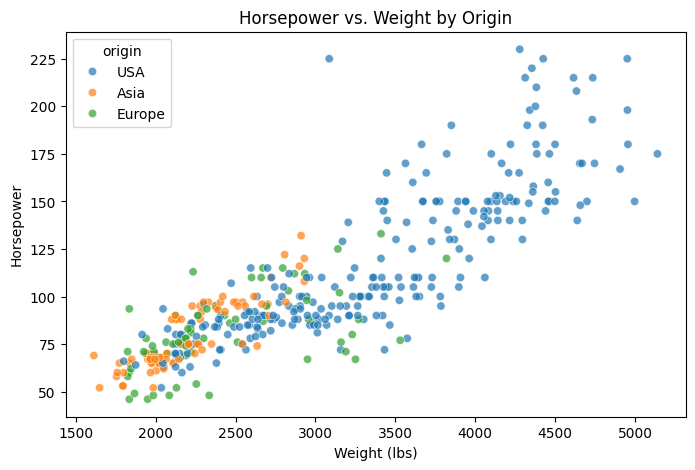

Correlation between weight and horsepower: 0.86

Average horsepower and weight by origin:
        horsepower  weight
origin                    
Asia          79.8  2221.2
Europe        80.9  2423.3
USA          118.6  3361.9
Scatter plot saved as 'weight_horsepower_scatter.png'


In [9]:
print("\n2. Creating scatter plot of horsepower vs. weight...")
plt.figure(figsize=(8, 5))
sns.scatterplot(x='weight', y='horsepower', hue='origin', data=df, alpha=0.7)
plt.title("Horsepower vs. Weight by Origin")
plt.xlabel("Weight (lbs)")
plt.ylabel("Horsepower")
plt.savefig('weight_horsepower_scatter.png')
plt.show()
plt.close()

# now we are going to calcualte the correlation and which is with the weight and the horse power

# the correlation which is close 1 will show an indication of being a positive relation ship 

corr = df['weight'].corr(df['horsepower'])
print(f"Correlation between weight and horsepower: {corr:.2f}")

# now what is being occured is that I will be calcualting the avg of the horsepower that we ahve and the weight but going by the origin 
hp_weight_by_origin = df.groupby('origin')[['horsepower', 'weight']].mean().round(1)
print("\nAverage horsepower and weight by origin:")
print(hp_weight_by_origin)
print("Scatter plot saved as 'weight_horsepower_scatter.png'")



## 3.3 - The MPG trends with the over time of the origin that is being shown here

In this analysis we will basically track the fuel of the effiency with time and we are going to see how it changes overtime in different regions, so this will help us to have a better analysis with how the manufactures responded to events like the oil and the crisis of the 1970s and understand the regional approaches of the fuel economy


3. Creating line chart of MPG trends over time...


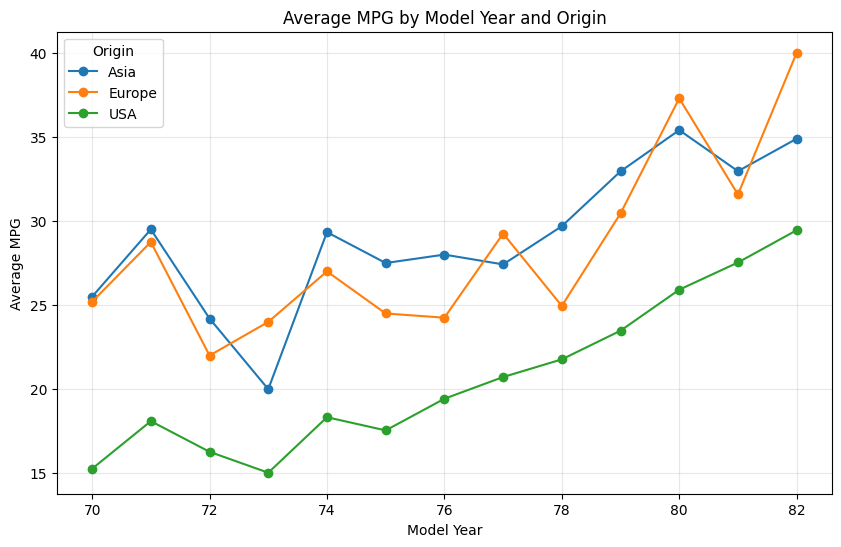

MPG improvement from 70 to 82:
  Asia: 25.5 to 34.9 MPG (9.4 increase, 36.8%)
  Europe: 25.2 to 40.0 MPG (14.8 increase, 58.7%)
  USA: 15.3 to 29.4 MPG (14.2 increase, 92.8%)
Line chart saved as 'mpg_trend.png'


In [10]:
# In this section what I will be doing is basically understandign the efficient with the MPG and how it changes overtime with teh different regions that is provided
# this is going to help is have a better understanding with the manufactures and how they respond to the energy crsises
print("\n3. Creating line chart of MPG trends over time...")
# we are going to be calcualting the avg of hte mpg going by the year and the origin 

yearly_mpg = df.groupby(['model_year', 'origin'])['mpg'].mean().unstack()

plt.figure(figsize=(10, 6))
for origin in yearly_mpg.columns:
    plt.plot(yearly_mpg.index, yearly_mpg[origin], marker='o', label=origin)

plt.title('Average MPG by Model Year and Origin')
plt.xlabel('Model Year')
plt.ylabel('Average MPG')
plt.legend(title='Origin')
plt.grid(True, alpha=0.3)
plt.savefig('mpg_trend.png')
plt.show()
plt.close()

# overhere is where we will be calcualting the the improvement basically going from the first to the last year that is presnted in our data set
# this is going to show the efficienty in our work and what has bene improved 

earliest_year = yearly_mpg.index.min()
latest_year = yearly_mpg.index.max()
print(f"MPG improvement from {earliest_year} to {latest_year}:")
for origin in yearly_mpg.columns:
    start_mpg = yearly_mpg.loc[earliest_year, origin]
    end_mpg = yearly_mpg.loc[latest_year, origin]
    change = end_mpg - start_mpg
    percent_change = (change / start_mpg) * 100
    print(f"  {origin}: {start_mpg:.1f} to {end_mpg:.1f} MPG ({change:.1f} increase, {percent_change:.1f}%)")
print("Line chart saved as 'mpg_trend.png'")

## 3.4 - The distribution by the origin:

For this analysis with what is going to be occured is that we are going to bascially compare the distribution of the MPG that is being presented across the region and for this scenario we are going to be using box plots and this visualization will basically help us understand the pattenr more and which region really started to use more of the fuel economy and showing the fuel efficiency with the region that it is associated with. 


4. Creating box plot of MPG by origin...


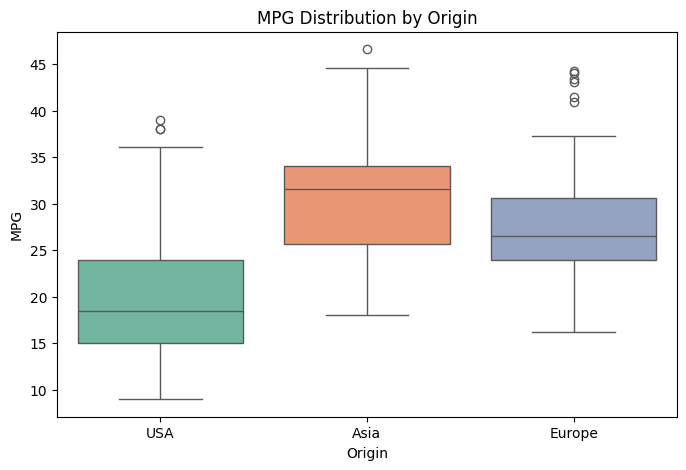

MPG statistics by origin:
         mean  median   min   max   std
origin                                 
Asia    30.45    31.6  18.0  46.6  6.09
Europe  27.89    26.5  16.2  44.3  6.72
USA     20.08    18.5   9.0  39.0  6.40
Box plot saved as 'mpg_by_origin.png'


In [11]:
# What I will be doing in this section is examine the the different of the origin and for this section what will be occured is the ability of hte use wit hteh box plot
# this visualization will basically visualize the tendency of each region 

print("\n4. Creating box plot of MPG by origin...")
plt.figure(figsize=(8, 5))
sns.boxplot(x='origin', y='mpg', data=df, hue='origin', palette='Set2', legend=False)
plt.title('MPG Distribution by Origin')
plt.xlabel('Origin')
plt.ylabel('MPG')
plt.savefig('mpg_by_origin.png')
plt.show()
plt.close()

# we are going ot be basically calucaltie the mpg stats with the orign that is provided. 

mpg_stats = df.groupby('origin')['mpg'].agg(['mean', 'median', 'min', 'max', 'std']).round(2)
print("MPG statistics by origin:")
print(mpg_stats)
print("Box plot saved as 'mpg_by_origin.png'")

## 3.5 - The analysis of the correlation that is being provided

In this final analysis that I wil lbe presenting with all of the variables that is being shown in the data set the heat map basically provides a much more comprehensive view with how the variables are being presented and related and helps us understand better to get a better idea when working with the strong factors of the fuel efficiency that is being provided 


5. Creating correlation heatmap...


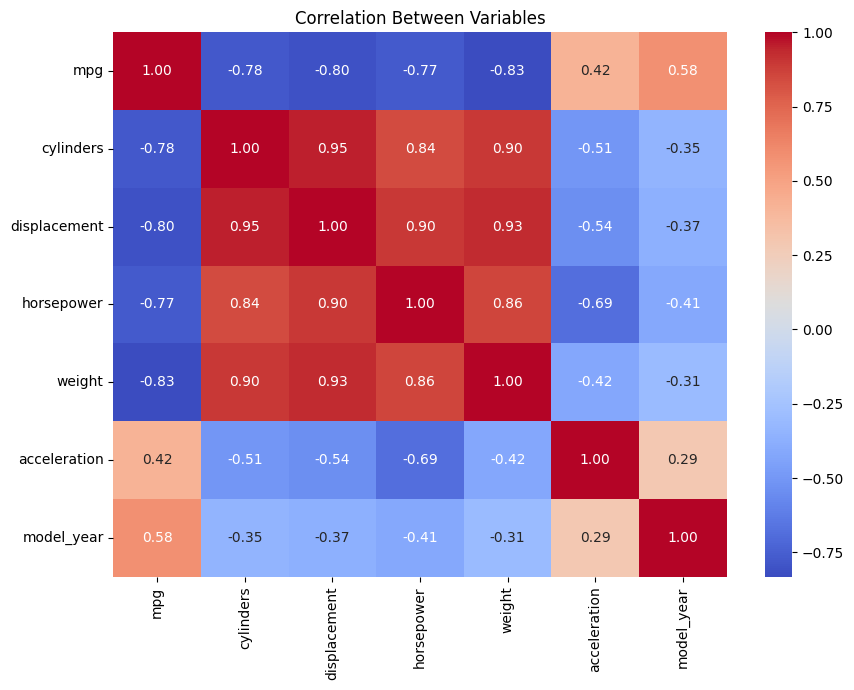

Correlations with MPG (from strongest positive to strongest negative):
  model_year: 0.58 (moderate positive correlation)
  acceleration: 0.42 (moderate positive correlation)
  horsepower: -0.77 (strong negative correlation)
  cylinders: -0.78 (strong negative correlation)
  displacement: -0.80 (strong negative correlation)
  weight: -0.83 (strong negative correlation)
Correlation heatmap saved as 'correlation_heatmap.png'


In [12]:
# At final what I will be doing here is that we are going to see how the numeric variables that is presented in our work can relate to each other 
# this is going ot help us with the factors that is really shown in with the fuel efficiency 

print("\n5. Creating correlation heatmap...")
plt.figure(figsize=(9, 7))
numeric_cols = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Variables')
plt.tight_layout()
plt.savefig('correlation_heatmap.png')
plt.show()
plt.close()

# we are going to be identifying a strong correlation that is being presented iwth the mpg
# this is goign to show which one is storngly affecting the fuel efficieiency

mpg_corr = corr_matrix['mpg'].sort_values(ascending=False)
print("Correlations with MPG (from strongest positive to strongest negative):")
for var, corr_val in mpg_corr.items():
    if var != 'mpg':  # we are goingto be skipping the self correlation here 
        relationship = "positive" if corr_val > 0 else "negative"
        strength = "strong" if abs(corr_val) > 0.7 else "moderate" if abs(corr_val) > 0.3 else "weak"
        print(f"  {var}: {corr_val:.2f} ({strength} {relationship} correlation)")
print("Correlation heatmap saved as 'correlation_heatmap.png'")

# 4. Summary of the finding 

So in the work that I have provided we can see there there is an analysis that is being made we make a couple conclusion that this work is providing and be able to display the key insights that it's showing, so what I will be presenting here is that we are going to be taking a look at the review summarize the insights that is being presented in our the visualizations and the analyses that we have managed to gather

## Engine Patterns Display

First in the analysis that I have managed to gather we notice that hte 4-8 cylinders engines was very common and this could possibly mean at the time that there was a culture trend that is being displayed:

- **4-cylinder engine** this engine was very heavly used in most Asian and European and it was presented in vehicles, in result we start to see that by going with this choice of engine it's actually more about priotizing the fuel efficieny

- **8-cylinder engine** What this engine is more about is that it's presented in American cars and at the time of year between 1970-1980 we notice a pattern that American at the time would really represent that it was more about the power and the performance of the car which is heavily shown if research is provided

So we see that the distribution of hte cylinder relates with the vehicle and basically showing what region really correlated with them and what was needed for, Asia and Europe seems to shwo that they are more heavily focused on fuel but Americans at the time focused more on the 8 cylinder

## Weight and the horsepower relationshio

By looking at the scatter plot that I have presented I have maanaged to show that there was a very good correlation that is being shown which is sitting around the time of 0.86 and this is actually shown between the horsepower and the weight of the car that is being presented, we see that the highlight trade off that is being shown is that the design when the power of the engine is utilized we see that the vehicle tend to be more heavier one of the side


### The Clear pattern that is being presented in the work

- We see that American and the USA vehicle would have a much higher weight and the horsepower that is being presented

- We start to notice that the asian vehichles tend to have a much lower weight but at a cost of a lower horsepower which really the focal point of this is basically focusingo n the efficiency that is being provided

- We also see that the European had a nice balance when it comes down to the power and the efficiency that the vehicle tends to provide in this time

So each had their own priority and each would have a different way of responding to the efficiency of the energy that was being provided at the time

## The MPG trends 

In this work that I am presenting I have decided to present a line chart with this line chart it's going to help us a lot and we also see data that is consistent and we also see the improvement that is being occured that is displayed with accorss of hte region from 1970 - > 1982 let's break down the high lights that is being presented

- Asian vehicles tend to maintain a much highter **MPG** that is being presetend for the majority of the preiod that we start to see

- Majority of the region that is shown here is that we see that there is much higher improvement that is being presented with we start to notice with how MPG increases the range for at least from 40-60% at least according to the data that we are workign with

- American vehicles has shown some sort of an improvement that we see and how they remained and reflecting on the MPG see that Asian and European tend to be lower on this scale

So basically what this is providing is that how there was external economic factors that is being presented and how and what design priorities was being presneted at the time and how they would respond to the pressure that was being presented

## MPG Distribution by Origin That we can analyze

So the box plot analysis we see that there is a origin confirmed and there has a huge differences especially when it comes down to the approaches that we are working with especially if we continue to analyze the fuel efficiency that is being provided

- So first we start see that the asian vehicles tend to have that the asian vehicles are usualy the highest on the median when it comes down to the MPG that is being presented

- European vehicles tend to be more on the higher on the MPG

- The American vehicle tend to be on the lowest on the median and show a variations of the distribution 

So we see here there there is a suggestion on the design of the manufactures like how the American tend to show different apporaches to the fuel efficiency 

# The insights of the correlation

So we start to see a correlation that is being presented in the heat map and there are some key insights that we should take a look at:

- We start to see a negatitve correaltions with the weight and the displacement, and the cylinders that is being provided which is with a (-0.83) (-0.80) (-0.78)

- There is also another analysis that could be made wee see that a heavy weight of the vehicle would realyl resutl in a poor fuel efficiency that is being provided. 

- we start to see a good and postiv e correlation that is being aligned with the dataset of the MPG which basically shows the trend and how it's being imrpoved

- Then we see that how that the manufactures have managed to find a way to improve the effiency of the work and without even hurting the performance that is being presneted

# 6. Conclusion

After finishing our analysis we see that there is a surge when it comes down to the insight that we are working and we see that there is a trend that is being occured especially during the time of the transformative period and then we see that there is certain conclusion that we can actually get to draw. 

1. **Technological evolution**: We are seeing that there is a surge of the tech evolution that is rising and its going over with having a greater fuel effiency that is being occured with the year of the 1970s and the 1980s that is being provided

2. **The Regional Design**: We start to see the region and the approaches when it comes down to the automotive

- American: They tend to have a larger and much more powerful cars with good componets which in exhange there is going to be a lower fuel effiency 

- European: We see that europeans tend to approach a more balanced when it comes down to the componets 

- Asian: We start to see that they focus on the lighter vehciles comes with better fuel economy

3. The Impact of the External: There has been numbers of the fuel effiency that is being presnted here and we see that with the oil crisis and become of such event we notice that there was a different in automotive design that is being presented 

4. The trade offs of the engineering: We start to see a good amount of the correlation between the weight and the power that si being presented and we see the negative correlation that is being occured with the MPG and how they are the trade offs and the the design that is being occured during the time period

5. Over time: So with over time all regions with time tend to show an improvement and this basically shows that the industry has the ability to make changes and adapt which is crucial i nthis industry.

So overall all these understanding shows a very valuable insight and understand the evolution and the process of the automotive industry/technlogy, and basically with how the industry can manage to change or while being understand pressure and understanding the economic factor which pretty much exist today and a concern that many of the industry always go through and change to meet the needs and understanding the energy and the enivormental concern that exist till this day. 
